# **GROUP E - PART 2 - EMOTION RECOGNITION CLASSIFICATION TASK**
# **Overview:**

The main objective of this assignment is to classify the images of people’s face to detect their emotion (Emotion Recognition). In this assignment, three different models have been performed for Emotion Recognition: Support Vector Machine (SVM) , Deep Neural Network (DNN) and Convolutional Neural Network (CNN). The SVM model achieved an accuracy of around 0.42 while the DNN model achieved an accuracy of around 0.36 and the CNN model obtained an accuracy of about 0.52.

Through this assignment, the significance of selecting the appropriate models for better performance has been discovered. CNN, which are able to learn spatial data, outperformed the other models in Emotion Recognition. The key takeaway of this assignment is how well CNN handle image data and perform better in identifying the facial expressions. Further, optimizing the architectures and hyperparameters of CNN can potentially attain even better results in Emotion Recognition.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cs985-987-emotion-recognition-project-2024/my_emotion_test.csv
/kaggle/input/cs985-987-emotion-recognition-project-2024/my_emotion_sample_submission.csv
/kaggle/input/cs985-987-emotion-recognition-project-2024/my_emotion_train.csv


# **Libraries and Modules used:**

**NumPy -** NumPy is a python library used for performing mathematical computations.

**Pandas -** Pandas is a python library used for the manipulation and analysis of the data.

**keras.utils -** A module that includes a variety of utility functions that are often used in deep learning tasks. 'to_categorical' is a function in the module that is used for one-hot encoding the categorical labels.

**sklearn.model_selection -** model_selection is a funtion in sklearn library that is used for model selection and evaluation, splitting datasets, etc. train_test_split is a utility function in the module that splits data into train and test subsets.

**sklearn.svm -** The scikit-learn (sklearn) library offers a range of tools where the sklearn.svm module is used for implementing Support Vector Machine (SVM) learning algorithms. 'SVC'- Support Vector Classifier is a class within the module that is used for classification tasks.

**sklearn.metrics -** The sklearn.metrics is a module in scikit-learn library that enables the evaluation of machine learning models. 'accuracy_score' and 'classification_report' are the utility functions that determines the results of the evaluation

**matplotlib.pyplot -** Primary plotting library that offers a diverse range of functions and classes to generate various types of plots, including line plots, scatter plots, bar plots, histograms, and more.

**keras.models -** The Keras library consists of various modules that provide classes and functions for the definition of neural network models.

**keras.layers -** This module contained in the Keras library includes a diverse range of layers that are useful in constructing neural network architectures.

**keras.losses -** A module in keras that grants access to a range of loss functions frequently used for the training of neural network models.

**keras.optimizers -** A module in keras that encompasses a range of optimization algorithms utilized for training the neural network models.

**keras.callbacks -** A module that contains a range of callback functions used throughout the training process of neural network models.



In [2]:
import numpy as np
import pandas as pd

# **Load and Read the Data:**

The CSV file named 'my_emotion_train.csv' contains the training data and 'my_emotion_test.csv' contains the test data. The training data and the test data are read from the directory into a pandas dataframe pd which is then assigned to the variables 'tr_data' and 'te_data' respectively.

In [3]:
tr_data=pd.read_csv('/kaggle/input/cs985-987-emotion-recognition-project-2024/my_emotion_train.csv')
te_data=pd.read_csv('/kaggle/input/cs985-987-emotion-recognition-project-2024/my_emotion_test.csv')

# **Display the Training and Test data:**

The first two rows of the dataframe is displayed using head(2) for verifying that the data has been loaded correctly. For example, tr_data.head(2) displays the first two rows in the training data.

In [4]:
tr_data.head(2)

,id,emotion,pixels
0,9415,6,29 16 18 18 18 20 19 18 17 17 17 18 17 18 17 1...
1,19109,3,126 154 167 181 188 194 195 194 196 195 198 20...


In [5]:
te_data.head(2)

,id,pixels
0,640,123 109 128 142 103 113 145 179 178 158 177 19...
1,6081,41 41 41 41 42 42 42 45 39 16 10 10 7 9 9 5 8 ...


# **Data Preprocessing:**

Initializing an empty list 'x_train' to store the preprocessed pixel data. Then, a loop is iterated over each row in 'pixels' column. Within the loop, the string of pixel values is divided into individual values using the space character. The resulting string list is then converted into a NumPy array with the 'float32' datatype. Next, the 1D array of pixel values is reshaped into 3D array with dimensions 48x48x1. The third dimension shows that each image has a grayscale. Lastly, the reshaped pixel data for each image is added to the 'x_train' list.

In [142]:
from keras.utils import to_categorical
x_train=[]
for pixels in tr_data["pixels"]:
    pixels=np.array(pixels.split(' '),dtype='float32')
    pixels=pixels.reshape(48,48,1)
    x_train.append(pixels)

Extracting the target labels (emotion) from the 'tr_data' and assign those labels to 'y_train'. Then, process the input data features. Iterate a loop over each image array 'x' in 'x_train'. Flatten the pixel values as many models expect input data to be flatten.

In [7]:
y_train=tr_data["emotion"]
x_train=np.array([x.flatten() for x in x_train])

Initializing an empty list 'x_test' to store the preprocessed pixel data like the one initialized for the 'x_train'. Then, a loop is iterated over each row in 'pixels' column. Within the loop, the string of pixel values is divided into individual values using the space character. The resulting string list is then converted into a NumPy array with the 'float32' datatype. Next, the 1D array of pixel values is reshaped into 3D array with dimensions 48x48x1. The third dimension shows that each image has a grayscale. Lastly, the reshaped pixel data for each image is added to the 'x_test' list.

In [8]:
x_test=[]
for pixels in te_data["pixels"]:
    pixels=np.array(pixels.split(' '),dtype='float32')
    pixels=pixels.reshape(48,48,1)
    x_test.append(pixels)

# **Normalization of Data:**

Normalization serves as a typical preprocessing step in machine learning, particularly in scenarios involving pixel data like images. The primary objective is to standardize the input features to a consistent range, usually spanning from 0 to 1, in order to promote reliable and effective model training.

Normalizing the pixel values of training data stored in 'x_train' and 'x_test' arrays. Each pixel value in the array is divided by 255.0 to scale the values between 0 and 1.

In [9]:
x_train=np.array(x_train)/255.0
x_test=np.array(x_test)/255.0

# **Splitting of Data into Training and Validation sets:**

In Machine learning, it is a standard procedure to divide the dataset into distinct subsets for training and validation. The training subset is utilized to train the model, whereas the validation subset is used to assess the model's performance.

Taking the input features as 'x_train' and target labels as 'y_train'. 'test_size' indicates the allocation of dataset for validation. In this case, it is set to 0.1, signifying that 10% of the data will be utilized for validation. The purpose of setting the 'random_state' parameter to 42 is to ensure reproducibility. 'x_val' and 'y_val' contains the input features and target labels of validation subset respectively.

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

# **Models:**

#  1. **Support Vector Machine (SVM):**

The Support Vector Machine (SVM) model is extensively used as a reliable classifier in emotion recognition. By effectively identifying the most suitable decision boundaries, SVM is able to accurately differentiate between various emotional states using input features.

Initializing the Support Vector Classifier (SVC) with 'kernel' and 'random_state' as parameters. 'rbf' is a popular type of kernel used for mapping input data into high dimensional space. Then, the SVC model is trained with the training data. The 'fit' function modifies the model's parameters in order to minimize the classification error on the training data.

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
model=SVC(kernel='rbf',random_state=42)
model.fit(x_train,y_train)

SVC(random_state=42)

# **Prediction on Validation set:**

The trained SVM model is utilized to predict the labels for the validation set (x_val). The SVM model's 'predict' method calculates the predicted labels by taking the input features. The accuracy score is evaluated by comparing the predicted labels (y_pred) with the true labels of the validation set (y_val). The accuracy score is determined by dividing the number of accurately predicted instances by the total number of instances present in the validation set. Finally, print the computed accuracy score to the console.

In [12]:
y_pred=model.predict(x_val)
accuracy=accuracy_score(y_val,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.42


# **Plotting the graph for the accuracy:**

Visualizing the accuracy of the SVM model using bar graph

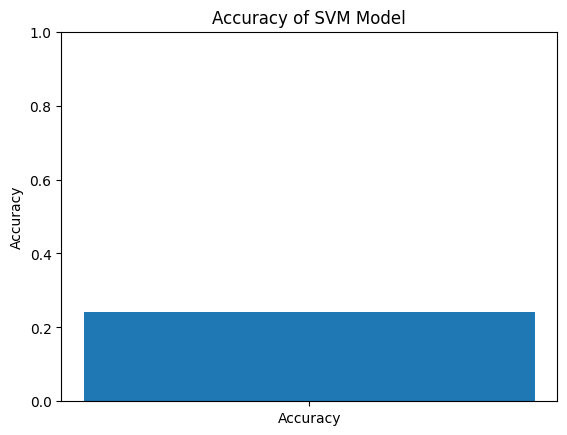

In [149]:
import matplotlib.pyplot as plt
plt.bar(["Accuracy"],[accuracy])
plt.ylabel("Accuracy")
plt.title("Accuracy of SVM Model")
plt.ylim(0,1)
plt.show()

Generate and print the comprehensive report that includes various evaluation metrics such as precision, recall, f1-score and support.

In [13]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.20      0.27       413
           1       1.00      0.04      0.08        48
           2       0.36      0.20      0.25       444
           3       0.47      0.72      0.57       703
           4       0.30      0.38      0.34       487
           5       0.57      0.49      0.53       308
           6       0.40      0.41      0.41       497

    accuracy                           0.42      2900
   macro avg       0.50      0.35      0.35      2900
weighted avg       0.43      0.42      0.40      2900



# **Making the final predictions on the test data:**

Reshaping the test data (x_test) into a two-dimensional array (x_test_flat) that is suitable for making predictions. The function x_test.shape[0] provides the count of samples present in the test data. '-1' indicates the certainty of all elements from the original data. At last, predict the labels for the reshaped test data (x_test_flat) using the trained SVM model.

In [14]:
x_test_flat=x_test.reshape(x_test.shape[0],-1)
final_pred=model.predict(x_test_flat)

# 2. **Deep Neural Network (DNN):**

The deep neural network (DNN) model is utilized in emotion recognition to extract complex patterns from input images, allowing for precise classification of emotions through facial expressions.

Assigning the number of classes in the classification problem to the variable 'num_classes'. Instantiate the Sequential class and then assign the resulting instance to the variable 'dnn_model'. This particular model is intended for constructing the deep neural network architecture in layer-by-layer.

In [82]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
num_classes=7
dnn_model=Sequential()

Add a flatten layer to the DNN model. The Flatten layer serves the purpose of transforming the input data by flattening it, thereby converting multi-dimensional data into one-dimensional array. This process involves condensing the input tensor into a vector format, enabling it to be seamlessly transferred to the subsequent dense layers. The 'input_shape' parameter defines the shape of the input data that the Flatten layer expects.

In [83]:
dnn_model.add(Flatten(input_shape=(48,48,1)))

Adding a dense layer with 512 neurons to the model. The Rectified Linear Unit (ReLU) activation function is preferred here because of its simplicity and efficiency. 'ReLU' is a highly effective activation function that substitutes negative values with zero while preserving the positive values. This computational operation is simple to execute, thereby enhancing its efficiency in training extensive neural networks. Similarly, introduce two additional dense layers containing 256 and 128 neurons using 'Relu' activation. After the inclusion of each dense layer, a dropout layer is appended with a dropout rate set at 0.2. Dropout is utilized as a regularization strategy to combat overfitting by selectively deactivating a fraction of input units to zero during training.

In [84]:
dnn_model.add(Dense(512,activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(256,activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(128,activation='relu'))
dnn_model.add(Dropout(0.2))

Softmax is a function that transforms the initial raw output scores, also known as logits, into probabilities. This conversion is achieved by exponentiating each score and subsequently normalizing them in a way that their sum equals 1. The inclusion of this dense layer with softmax activation function serves as the final layer of the deep neural network (DNN) model.

In [85]:
dnn_model.add(Dense(num_classes,activation='softmax'))

Creating a new instance of the Stochastic Gradient Descent(SGD) optimizer by specifying certain hyperparameters such as the 'learning_rate' and the 'momentum'. The 'learning rate' is a key factor in deciding the size of the updates applied to the model weights throughout the training process. In this instance, a learning rate of 0.01 has been selected. The 'momentum' parameter plays a significant role in enhancing the acceleration of SGD in the appropriate direction while reducing oscillations. A momentum value of 0.9 has been explicitly defined here. Employing SGD with a momentum setting of 0.9 facilitates faster convergence and more effective navigation through local minima. The compile() function defines the optimizer, loss function, and evaluation metrics that will be utilized during the training. The loss function specified for multi-class classification problems is the categorical cross-entropy loss function. Throughout the training process, the model will assess its performance by employing accuracy as the evaluation metric.

In [86]:
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD
sgd=SGD(learning_rate=0.01,momentum=0.9)
dnn_model.compile(optimizer=sgd,loss=categorical_crossentropy,metrics=['accuracy'])

# * **Reshaping the Input Data:**

The reshape() method is used to modify the shape of the input array in order to align it with the expected input shape of the model. Reshaping the training input data ('x_train') to have a new shape (-1,48,48,1). The original size of array determines the inference of the first dimension (number of samples), denoted by -1. The dimensions (48,48,1) that follow indicate the height, width, and number of channels of the input images, respectively.

# * **Reshaping the Validation Data:**

Similar to reshaping the training input data, reshape the validation data ('x_val) to have the shape (-1,48,48,1).

# * **One-Hot Enocding:**

Encode the training labels (y_train) and validation labels (y_val)using one-hot encoding. 1. One-hot encoding is a method used to transform categorical labels into a binary matrix format. In this representation, each category is denoted by a binary vector containing a single '1' at the position corresponding to the category, while the rest of the vector is filled with '0's. 1. 'to_categorical' method transforms the integer-encoded labels into their corresponding one-hot encoded forms.

In [87]:
from tensorflow.keras.utils import to_categorical
x_train_reshaped=x_train.reshape(-1,48,48,1)
x_val_reshaped=x_val.reshape(-1,48,48,1)
y_train_encoded=to_categorical(y_train,num_classes=7)
y_val_encoded=to_categorical(y_val,num_classes=7)

# **Invoking the fit():**

The DNN model undergoes training by invoking the fit() method, which utilizes the provided training data (x_train_reshaped, y_train_encoded) and validation data (x_val_reshaped, y_val_encoded). Throughout the training process, the model's weights and biases are adjusted incrementally through the use of backpropagation and optimization technique (SGD). The model's performance on the training data improves gradually as the training process advances through 30 epochs.

In [93]:
dnn_model.fit(x_train_reshaped,y_train_encoded,epochs=30,batch_size=32,validation_data=(x_val_reshaped,y_val_encoded))

Epoch 1/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3875 - loss: 1.5776 - val_accuracy: 0.3690 - val_loss: 1.5959
Epoch 2/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3712 - loss: 1.5893 - val_accuracy: 0.3638 - val_loss: 1.6056
Epoch 3/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3808 - loss: 1.5706 - val_accuracy: 0.3621 - val_loss: 1.6103
Epoch 4/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3849 - loss: 1.5759 - val_accuracy: 0.3634 - val_loss: 1.6189
Epoch 5/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3875 - loss: 1.5709 - val_accuracy: 0.3738 - val_loss: 1.5802
Epoch 6/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3871 - loss: 1.5595 - val_accuracy: 0.3707 - val_loss: 1.5991
Epoch 7/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3887 - loss: 1.5653 - val_accuracy: 0.3717 - val_loss: 1.6052
Epoch 8/30
816/816 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3928 - loss: 1.5479 - val_accuracy: 0.

# **Making final predictions on test data:**

The DNN model utilizes the predict() method to predict the probabilities of each class for all samples within the test dataset ('x_test'). The argmax() function is subsequently utilized on these predicted probabilities ('dnn_pred') in order to identify the class with the greatest probability for each individual sample, thereby assigning the predicted class label ('pred_labels').

In [94]:
dnn_pred=dnn_model.predict(x_test)
pred_labels=np.argmax(dnn_pred,axis=1)

216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


It is crucial to clear the computational graph and release memory resources linked to previous models and layers when training multiple models in TensorFlow/Keras. The clear_session() method provides a convenient approach to clear the existing Keras session, which includes the computational graph and any state associated with the model.

In [110]:
import tensorflow as tf
tf.keras.backend.clear_session()

Creating an instance of Sequential and assign the resulting instance to the variable 'cnn_model'.

In [111]:
from keras.layers import Conv2D,MaxPooling2D
cnn_model=Sequential()

# * **Adding Convolutional Layers:**

Adding a 2D convolutional layer to the model that consists of 64 filters with a kernel size of (3,3). Convolutional layers use learnable filters to perform convolutions and extract distinctive features from the input images. The Rectified Linear Unit (ReLU) activation function is used here because of its efficiency. The dimensions used in the input data are 48x48 pixels and they are grayscale consisting of only one channel.

# * **Adding MaxPooling Layers:**

Following the Convolutional layer, inserting a 2D MaxPooling layer to the model which reduces the spatial dimensions of the feature maps, helping to extract the most significant features and reduce complexity. Specifying the size of the pooling window, (2,2). Similarly, adding convolutional layers of 128 and 256 filters each followed by a MaxPooling layer.

In [112]:
cnn_model.add(Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(128,(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(256,(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

Flatten() in a convolutional neural network (CNN) serves the purpose of transforming the two-dimensional feature maps generated by the convolutional and pooling layers into a single-dimensional vector.

In [113]:
cnn_model.add(Flatten())

# * **Adding Dense Layers:**

A fully connected layer consisting of 512 neurons is incorporated into the model, with the activation function being Rectified Linear Unit (ReLU). Likewise, adding two more dense layers with 256 and 128 neurons respectively.

# * **Adding Dropout Layers:**

After each dense layer, add a dropout layer with a dropout rate of 0.2 which can be used to avoid overfitting during the training process where a portion of input units is randomly set to zero.

In [114]:
cnn_model.add(Dense(512,activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(256,activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dropout(0.2))

Introducing an output layer to the neural network, consisting of 7 neurons. Each neuron corresponds to a specific class in a multi-class classification task. To facilitate the classification decision, the softmax activation function is utilized. This function generates probability scores for each class, enabling the production of a probability distribution across the various classes.

In [115]:
cnn_model.add(Dense(7,activation='softmax'))

Preparing the neural network model (cnn_model) for training. The optimizer used is, the loss function is sparse categorical crossentropy, and the evaluation metric is accuracy. This setting is required to train the model effectively on a dataset.

In [127]:
from keras.optimizers import Adam
cnn_model.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Training the CNN model across 5 epochs with early stopping enabled. The training process is monitored based on the validation loss and training is terminated if the validation loss does not improve for 5 consecutive epochs. Early stopping is a technique for preventing overfitting that involves stopping the training process as soon as the model's performance on a validation dataset stops improving.

In [129]:
from keras.callbacks import EarlyStopping
cnn_model.fit(x_train_reshaped,y_train_encoded,epochs=5,batch_size=32,validation_data=(x_val_reshaped,y_val_encoded),callbacks=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='min'))

Epoch 1/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 129s 159ms/step - accuracy: 0.3011 - loss: 1.7108 - val_accuracy: 0.3752 - val_loss: 1.5411
Epoch 2/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 129s 158ms/step - accuracy: 0.4098 - loss: 1.4988 - val_accuracy: 0.4231 - val_loss: 1.4677
Epoch 3/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 129s 158ms/step - accuracy: 0.4686 - loss: 1.3701 - val_accuracy: 0.4945 - val_loss: 1.3190
Epoch 4/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 129s 158ms/step - accuracy: 0.5230 - loss: 1.2671 - val_accuracy: 0.4928 - val_loss: 1.3098
Epoch 5/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 141s 157ms/step - accuracy: 0.5447 - loss: 1.2009 - val_accuracy: 0.5166 - val_loss: 1.2699


Making predictions (cnn_pred) for the test dataset using the trained CNN model and then extract the predicted class labels (pred_lab) by taking the index of the highest probability prediction for each sample. This step evaluates the performance of the model and compares its predictions to the true labels for the test dataset.

In [130]:
cnn_pred=cnn_model.predict(x_test)
pred_lab=np.argmax(cnn_pred,axis=1)

216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step


# **Submsission:**

The final predictions of trained CNN model on the test data (x_test) are saved in a CSV file named 'cnn_submission.csv' where the submission file contains the '**id**' from 'te_data' and '**emotion**' from 'pred_lab'

In [131]:
submission_dnn=pd.DataFrame({'id':te_data['id'],'emotion':pred_lab})
submission_dnn.to_csv('/kaggle/working/cnn_submission.csv',index=False)

# **Results and Analysis:**

**Overview of Model Performance:**


| Models                       | Accuracy | Kaggle Score |
|------------------------------|----------|--------------|
| Support Vector Machine (SVM) | 0.42     | 0.42         |
| Deep Neural Network (DNN)    | 0.3617   | 0.38         |
| Convolutional Neural Network | 0.5166   | 0.52         |



**Key findings and learnings:**

* CNN surpasses SVM and DNN in emotion recognition because of its capability to understand spatial data.

* The standardization of input features through data normalization enhances the training of the model.

* The performance of CNN can be further enhanced by carefully selecting suitable architectures and hyperparameters. 

* Additionally, the implementation of early stopping helps in preventing overfitting during the training process.

# **Summary:**

Based on the results and the performance of the models, it is shown that the CNN model is the most effective among the three. CNNs are specifically built to capture spatial hierarchies of characteristics, allowing them to learn complex patterns and representations more efficiently. Although SVMs are adaptable, they may struggle to capture detailed properties when compared to CNNs. Despite their depth, deep neural networks may lack the specialized architecture required, resulting in reduced accuracy in this context. The CNN model beats SVM and DNN resulting in higher accuracy. The CNN model's complexity grows in correlation with the quantity of layers, filters, neurons, and connections.

**References**

1. S. Y. Chaganti, I. Nanda, K. R. Pandi, T. G. N. R. S. N. Prudhvith and N. Kumar, "Image Classification using SVM and CNN," 2020 International Conference on Computer Science, Engineering and Applications (ICCSEA), Gunupur, India, 2020, pp. 1-5, doi: 10.1109/ICCSEA49143.2020.9132851.

2. Kim, Y. (2014). Convolutional Neural Networks for Sentence Classification. [online] arXiv.org. Available at: https://arxiv.org/abs/1408.5882.

3. ter Burg, K. and Kaya, H. (2022) ‘Comparing Approaches for Explaining DNN-Based Facial Expression Classifications’, Algorithms, 15(10), p. 367. Available at: https://doi.org/10.3390/a15100367.